<a href="https://colab.research.google.com/github/jadams156530/CS4410/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 1000x600 with 0 Axes>

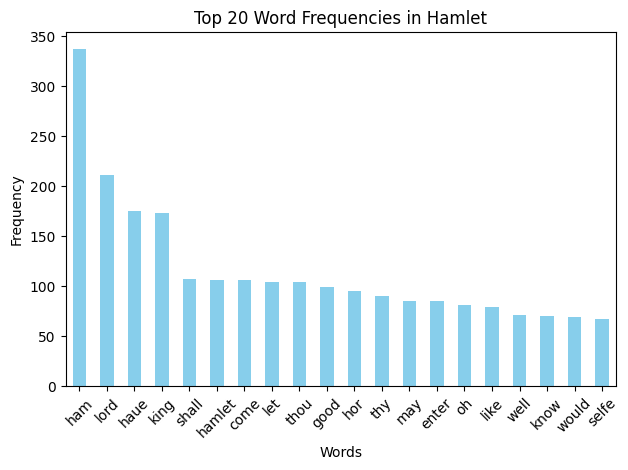

<ipython-input-3-e679f4e182b9>:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


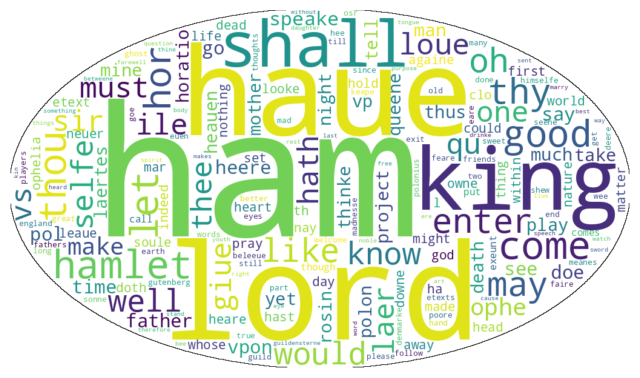

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import requests
import imageio

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Hamlet text
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

# Converting to TextBlob object
blob = TextBlob(data)

# Tokenizing
words = word_tokenize(str(blob.lower()))

# Getting english stopwords
stop_words = set(stopwords.words('english'))

# Filtering words
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Calculating word frequencies
word_counts = Counter(filtered_words)

# Getting the top 20 frequent words
top_20 = word_counts.most_common(20)

# Converting the top 20 words to pandas
df = pd.DataFrame(top_20, columns=['Word', 'Frequency'])

# Creating bar chart
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='Word', y='Frequency', legend=False, color='skyblue')
plt.title('Top 20 Word Frequencies in Hamlet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Loading mask image
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

# Generating word cloud
wordcloud = WordCloud(mask=mask_image, background_color='white', contour_color='black', contour_width=1).generate_from_frequencies(word_counts)

# Plotting word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
